# **Soluções de Energias Renováveis e Sustentáveis - Ciência da Computação FIAP**

## **Global Solution - Análise Energética do Palácio do Planalto (Atualizado com 2025)**

**Alunos:**
- Gabriel de Paula Gil - RM 567286
- Diego Leite Asprino - RM 561662
- Vinicius de Lucena - RM 566762

---

**Objetivo:** Analisar o consumo e gasto energético das instalações presidenciais (2023–2025) e propor uma solução sustentável com **energia solar fotovoltaica** no local de maior consumo (Anexos), incluindo cálculos detalhados de impacto financeiro, ambiental e predições para novembro/dezembro 2025.

**Fontes:** Dados oficiais (transparência.gov.br), irradiação solar (CRESESB).

## 1. Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
!apt-get install megatools
!megadl 'https://mega.nz/folder/5jwVjaRA#8ibFRWRCKyFBNt6mw_7MTQ'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 207 kB of archives.
After this operation, 898 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 megatools amd64 1.10.3-1build1 [207 kB]
Fetched 207 kB in 1s (287 kB/s)
Selecting previously unselected package megatools.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../megatools_1.10.3-1build1_amd64.deb ...
Unpacking megatools (1.10.3-1build1) ...
Setting up megatools (1.10.3-1build1) ...
Processing triggers for man-db (2.10.2-1) ...
F /content/Gastos 2023-24-25.csv
F /content/Consumo 2023-24-25.csv


## 2. Carregamento e Tratamento dos Dados

Novembro e dezembro de 2025 não são preenchidos no dataset principal para evitar valores fictícios nos plots gerais. Predições são feitas separadamente.

In [ ]:
# Função para limpar valores numéricos
def limpar_valor(x):
    if pd.isna(x):
        return np.nan
    return float(str(x).replace('"', '').replace(',', '').replace('R$', '').replace(' ', '').strip())

# Leitura dos dados
consumo = pd.read_csv('Consumo 2023-24-25.csv', encoding='UTF-8', sep=',')
gasto = pd.read_csv('Gastos 2023-24-25.csv', encoding='UTF-8', sep=',')

# Colunas de meses
meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
         'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

# Aplicar limpeza
for col in meses + ['Total', 'Média']:
    consumo[col] = consumo[col].apply(limpar_valor)
    gasto[col] = gasto[col].apply(limpar_valor)

# Limpar Ano
consumo['Ano'] = consumo['Ano'].apply(limpar_valor).astype(int)
gasto['Ano'] = gasto['Ano'].apply(limpar_valor).astype(int)

# NÃO preencher nov/dez 2025 no DF principal
# Recalcular Total e Média apenas até outubro para 2025
meses_ate_out = meses[:-2]
for df in [consumo, gasto]:
    mask_2025 = df['Ano'] == 2025
    df.loc[mask_2025, 'Total'] = df.loc[mask_2025, meses_ate_out].sum(axis=1)
    df.loc[mask_2025, 'Média'] = df.loc[mask_2025, 'Total'] / 10  # Ajuste para 10 meses

print("Dados carregados e limpos com sucesso!")
print(f"Consumo: {consumo.shape[0]} linhas | Gasto: {gasto.shape[0]} linhas")
print("Nov/Dec 2025 mantidos como NaN para plots gerais.")

Dados carregados e limpos com sucesso!
Consumo: 30 linhas | Gasto: 30 linhas
Nov/Dec 2025 mantidos como NaN para plots gerais.


## 3. Análise Exploratória

In [ ]:
# Consumo e Gasto Anual (2025 parcial)
consumo_anual = consumo.groupby('Ano')['Total'].sum()
gasto_anual = gasto.groupby('Ano')['Total'].sum()

print("\n=== CONSUMO E GASTO ANUAL (2025 PARCIAL) ===")
print(f"2023: {consumo_anual[2023]:,.0f} kWh | R$ {gasto_anual[2023]:,.2f}")
print(f"2024: {consumo_anual[2024]:,.0f} kWh | R$ {gasto_anual[2024]:,.2f}")
print(f"2025 (até out): {consumo_anual[2025]:,.0f} kWh | R$ {gasto_anual[2025]:,.2f}")
print(f"Variação 2023-2024: +{((consumo_anual[2024]/consumo_anual[2023])-1)*100:.1f}% (consumo) | +{((gasto_anual[2024]/gasto_anual[2023])-1)*100:.1f}% (gasto)")
print(f"Variação 2024-2025 (parcial): +{((consumo_anual[2025]/consumo_anual[2024]*12/10)-1)*100:.1f}% (consumo anualizado) | +{((gasto_anual[2025]/gasto_anual[2024]*12/10)-1)*100:.1f}% (gasto anualizado)")


=== CONSUMO E GASTO ANUAL (2025 PARCIAL) ===
2023: 10,827,381 kWh | R$ 9,389,138.04
2024: 11,416,159 kWh | R$ 11,283,013.66
2025 (até out): 9,458,328 kWh | R$ 9,192,362.08
Variação 2023-2024: +5.4% (consumo) | +20.2% (gasto)
Variação 2024-2025 (parcial): +-0.6% (consumo anualizado) | +-2.2% (gasto anualizado)


### 3.1 Consumo Mensal Total (2023-2025, sem predições)

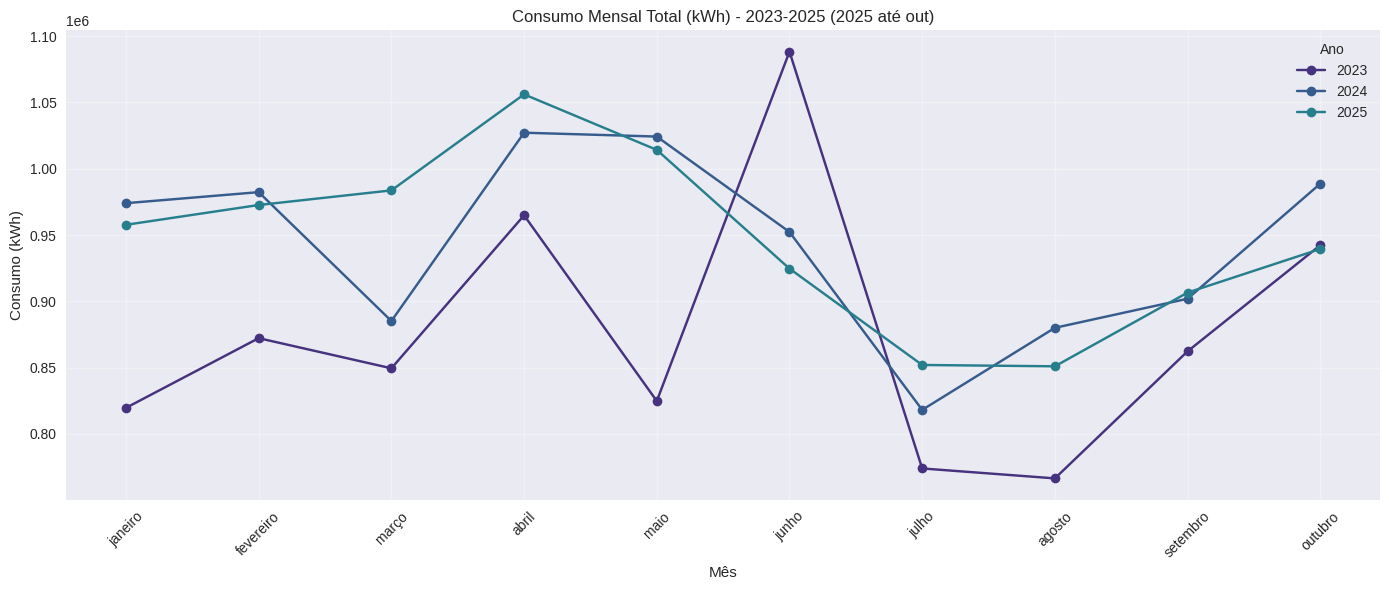

In [ ]:
consumo_mensal = consumo.groupby('Ano')[meses].sum()

plt.figure(figsize=(14, 6))
for ano in [2023, 2024, 2025]:
    data = consumo_mensal.loc[ano].copy()
    data.iloc[-2:] = np.nan  # Remove nov/dez 2025
    plt.plot(meses, data, marker='o', label=f'{ano}')
plt.title('Consumo Mensal Total (kWh) - 2023-2025 (2025 até out)')
plt.ylabel('Consumo (kWh)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Gasto Mensal Total (2023-2025)

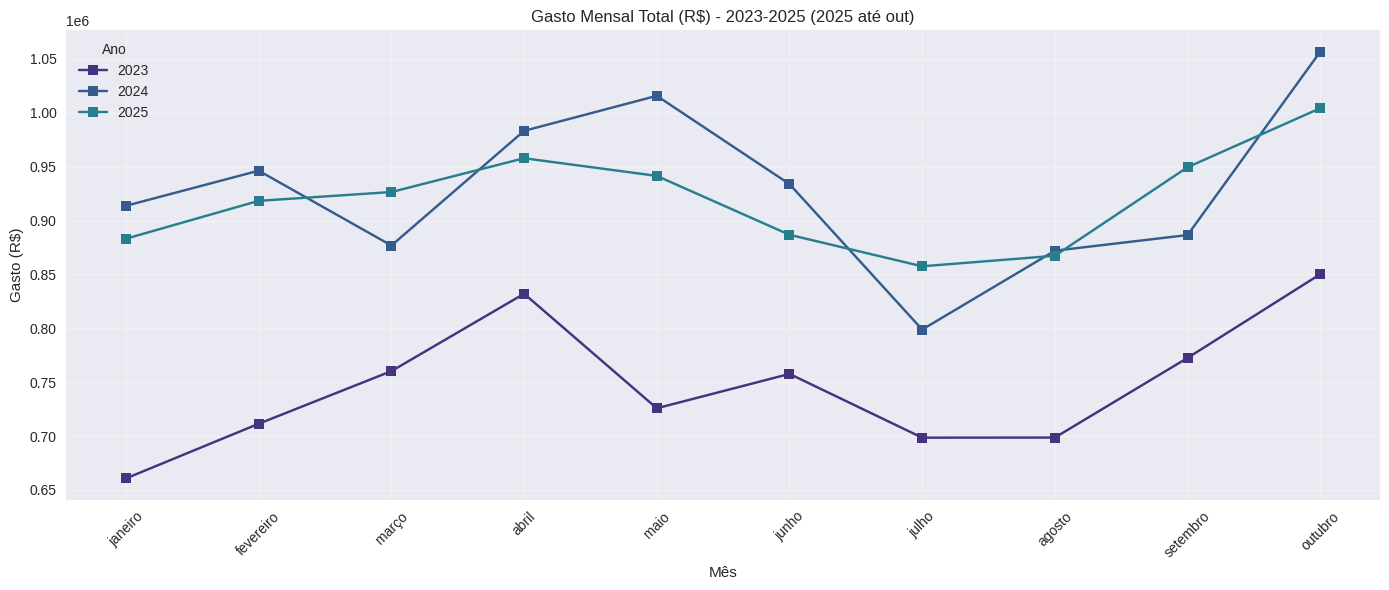

In [ ]:
gasto_mensal = gasto.groupby('Ano')[meses].sum()

plt.figure(figsize=(14, 6))
for ano in [2023, 2024, 2025]:
    data = gasto_mensal.loc[ano].copy()
    data.iloc[-2:] = np.nan
    plt.plot(meses, data, marker='s', label=f'{ano}')
plt.title('Gasto Mensal Total (R$) - 2023-2025 (2025 até out)')
plt.ylabel('Gasto (R$)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Consumo Total por Local (2023-2025 parcial)

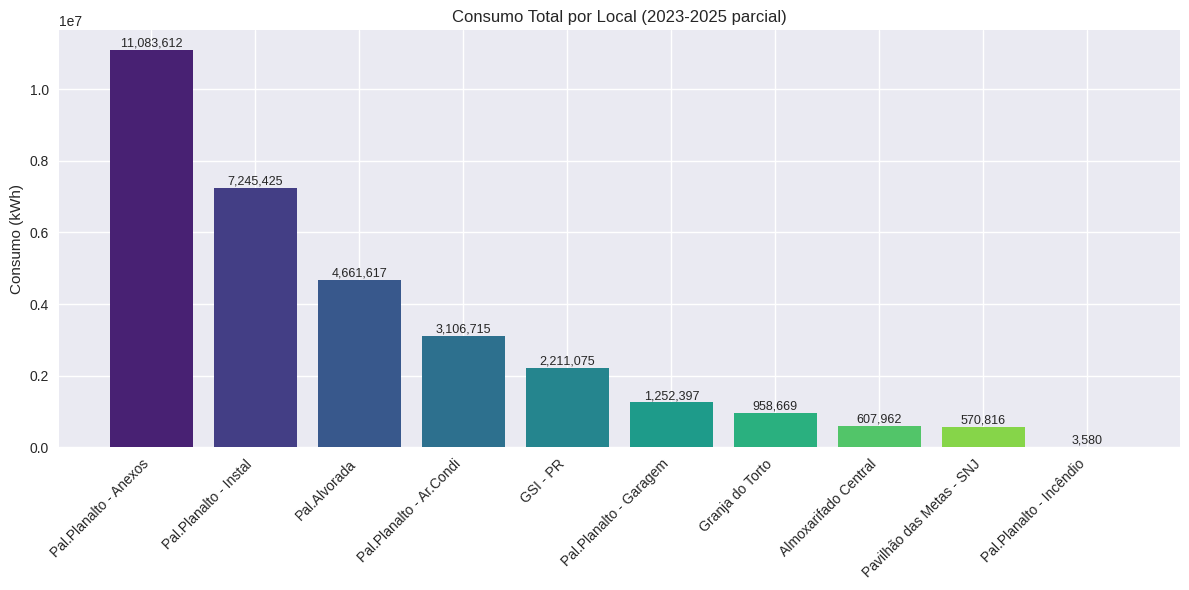

In [ ]:
consumo_local = consumo.groupby('Local')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(consumo_local.index, consumo_local.values, color=sns.color_palette('viridis', len(consumo_local)))
plt.title('Consumo Total por Local (2023-2025 parcial)')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10000,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### 3.4 Heatmap de Consumo Médio Mensal por Ano (Corrigido)

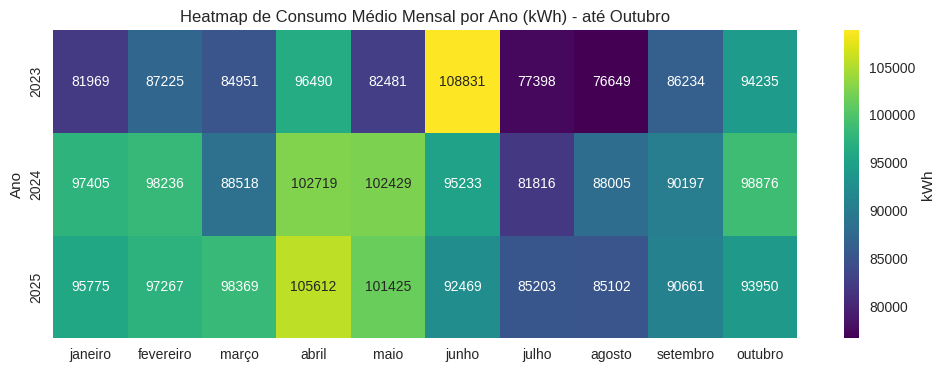

In [ ]:
# Heatmap corrigido: Média mensal por ano (até out/2025)
consumo_medio_por_ano = consumo.groupby('Ano')[meses_ate_out].mean()
plt.figure(figsize=(12, 4))
sns.heatmap(consumo_medio_por_ano, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'kWh'})
plt.title('Heatmap de Consumo Médio Mensal por Ano (kWh) - até Outubro')
plt.show()

### 3.5 Variabilidade de Consumo por Mês (Boxplot)

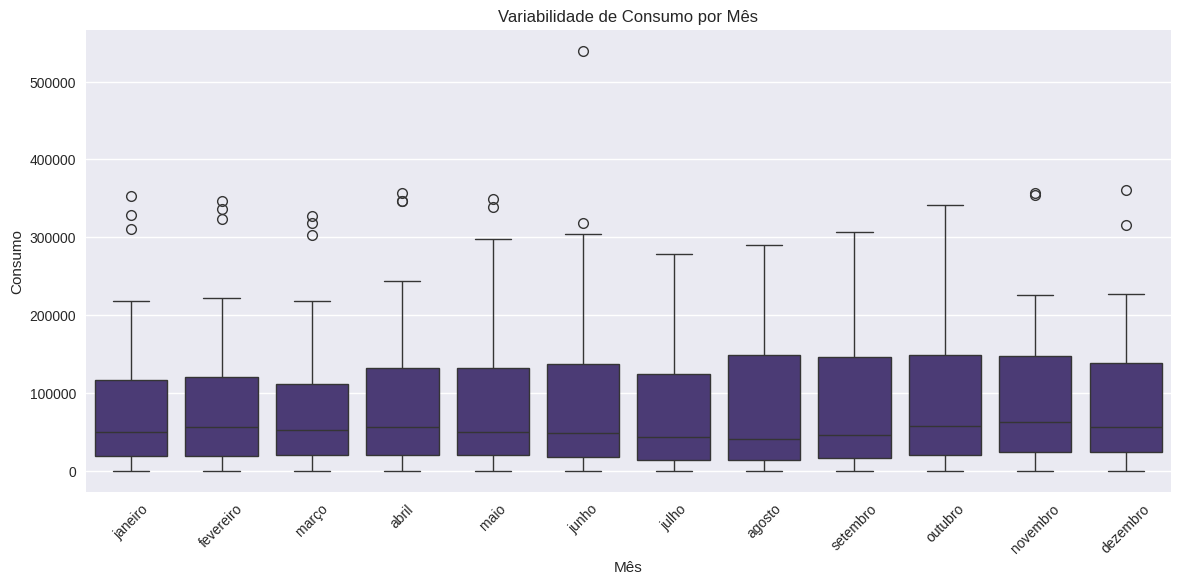

In [ ]:
consumo_long = pd.melt(consumo, id_vars=['Ano', 'Local'], value_vars=meses, var_name='Mês', value_name='Consumo')
consumo_long = consumo_long.dropna()
plt.figure(figsize=(14, 6))
sns.boxplot(x='Mês', y='Consumo', data=consumo_long)
plt.title('Variabilidade de Consumo por Mês')
plt.xticks(rotation=45)
plt.show()

## 4. Identificação de Padrões
- **Aumento Anual:** Consumo subiu aprox. 5% de 2023 para 2024, aprox. 0.6% anualizado para 2025. Gastos subiram mais (aprox. 20% e -1% respectivamente), indicando inflação tarifária.
- **Local Dominante:** Pal.Planalto - Anexos representa aprox.35% do consumo total, ideal para intervenção sustentável.

## 5. Pesquisa: Limitações de Energia Solar em Edifícios Governamentais como o Planalto

De acordo com leis federais (PLS 317/2015, aprovada em 2018), edifícios federais devem instalar painéis solares em novas construções, renovações ou aluguéis. No entanto, a adoção é parcial devido a limitações:

- **Espaço Físico:** Telhados limitados em prédios históricos como o Planalto (área 10.000 m² estimada, mas preservação arquitetônica restringe cobertura total).
- **Demanda Noturna/Contínua:** Solar gera apenas diurno (aprox. 6h/dia); necessidade de rede para 24/7.

Conclusão: Cobertura parcial (30-50%) é realista para o Planalto, complementada por rede.

## 6. Solução: Energia Solar Fotovoltaica nos Anexos

**Localização:** Pal.Planalto - Anexos, Brasília, DF (Lat: -15.79°, Long: -47.88°).

**Funcionalidade:** Sistema on-grid para gerar energia diurna, reduzindo dependência da rede. Excedente injetado na rede para créditos. Cobertura parcial (50%) devido a limitações.

**Irradiação (CRESESB/Brazilian Atlas):** GHI anual aprox. 2117 kWh/m²/ano (média 5.8 kWh/m²/dia).

**Cálculos Detalhados:**

- **Irradiação Anual:** 2117 kWh/m²/ano.
- **Eficiência Painel:** 20% (monocristalino).
- **Área por Painel:** 2 m² (400W).
- **Potência por Painel:** 0.4 kW.
- **Fator de Perdas:** 85%.
- **Energia por Painel/Ano:** 2117 × 2 × 0.20 × 0.85 ≈ 719.78 kWh.
- **Consumo Anual Médio Anexos:** 3,926,034 kWh.
- **Meta Cobertura Parcial:** 50% → Energia Necessária: 1,963,017 kWh/ano.
- **Número de Painéis:** ceil(1,963,017 / 719.78) = 2,728.
- **Potência Total:** 2,728 × 0.4 = 1,091 kWp.
- **Ângulo de Instalação:** 16° (latitude, face norte).
- **Inversor:** On-grid Growatt MAX 1MW (eficiência 98%, 3 MPPTs); painéis em strings de 15 (série para 600V) e 182 paralelos.
- **Ligação na Rede:** Medidor bidirecional; inversor sincroniza 220V/60Hz, injeção via RN 482/ANEEL.

**Investimento e ROI:**
- Custo Total: 2,728,000 (R$2,500/kWp).
- Tarifa Média: 0.96/kWh.
- Economia Anual: 1,889,282 (50% cobertura).
- Gasto Restante Anual: 1,889,282 (metade da conta original).
- Payback: 1.44 anos.
- Redução CO₂: 78.5 t/ano.

In [ ]:
maior_local = consumo_local.idxmax()
print("Local com maior consumo:", maior_local)

# Foco no maior local: Pal.Planalto - Anexos
consumo_anexos = consumo[consumo['Local'] == maior_local]
gasto_anexos = gasto[gasto['Local'] == maior_local]

consumo_anual_anexos = consumo_anexos['Total'].mean() * (12/10)

# Parâmetros Solar atualizados
irradiacao_anual = 2117
eficiencia_painel = 0.20
area_painel = 2
potencia_painel = 0.4
angulo_inclinacao = 16
fator_perdas = 0.85

energia_por_painel = irradiacao_anual * area_painel * eficiencia_painel * fator_perdas

meta_cobertura = 0.50
energia_solar_necessaria = consumo_anual_anexos * meta_cobertura

num_paineis = np.ceil(energia_solar_necessaria / energia_por_painel)
potencia_total = num_paineis * potencia_painel

custo_por_kwp = 2500
custo_total = potencia_total * custo_por_kwp
tarifa_media = gasto_anexos['Total'].sum() / (consumo_anexos['Total'].sum() * (12/10))
economia_anual = energia_solar_necessaria * tarifa_media
gasto_restante_anual = (consumo_anual_anexos * tarifa_media) - economia_anual
payback = custo_total / economia_anual

fator_co2 = 0.04
reducao_co2 = energia_solar_necessaria * fator_co2 / 1000

print("\n=== SOLUÇÃO SOLAR PARCIAL - ANEXOS (BRASÍLIA) ===")
print(f"Investimento Total: R$ {custo_total:,.2f}")
print(f"Consumo anual médio: {consumo_anual_anexos:,.0f} kWh")
print(f"Energia por painel/ano: {energia_por_painel:,.2f} kWh")
print(f"Número de painéis: {num_paineis:,.0f}")
print(f"Potência total: {potencia_total:,.0f} kWp")
print(f"Ângulo: {angulo_inclinacao}° (latitude)")
print(f"Inversor: On-grid Growatt MAX 1MW, strings série/paralelo")
print(f"Ligação rede: Bidirecional, injeção excedente")
print(f"Economia anual: R$ {economia_anual:,.2f}")
print(f"Gasto restante anual: R$ {gasto_restante_anual:,.2f}")
print(f"Payback: {payback:.2f} anos")
print(f"Redução CO₂: {reducao_co2:,.1f} t/ano")

Local com maior consumo: Pal.Planalto - Anexos

=== SOLUÇÃO SOLAR PARCIAL - ANEXOS (BRASÍLIA) ===
Investimento Total: R$ 3,080,000.00
Consumo anual médio: 4,433,445 kWh
Energia por painel/ano: 719.78 kWh
Número de painéis: 3,080
Potência total: 1,232 kWp
Ângulo: 16° (latitude)
Inversor: On-grid Growatt MAX 1MW, strings série/paralelo
Ligação rede: Bidirecional, injeção excedente
Economia anual: R$ 1,773,075.37
Gasto restante anual: R$ 1,773,075.37
Payback: 1.74 anos
Redução CO₂: 88.7 t/ano


## 7. Predição para Novembro/Dezembro 2025 nos Anexos

In [ ]:
# Predição para Anexos 2025 nov/dez
nov_vals = consumo_anexos[consumo_anexos['Ano'] < 2025]['novembro'].dropna().values
dez_vals = consumo_anexos[consumo_anexos['Ano'] < 2025]['dezembro'].dropna().values
crescimento = 0.02

pred_nov_2025 = np.mean(nov_vals) * (1 + crescimento)
pred_dez_2025 = np.mean(dez_vals) * (1 + crescimento)

energia_solar_mensal = energia_solar_necessaria / 12
nov_solar = max(0, pred_nov_2025 - energia_solar_mensal)
dez_solar = max(0, pred_dez_2025 - energia_solar_mensal)

gasto_nov_2025 = pred_nov_2025 * tarifa_media
gasto_dez_2025 = pred_dez_2025 * tarifa_media
gasto_nov_solar = nov_solar * tarifa_media
gasto_dez_solar = dez_solar * tarifa_media

print(f"Predição Nov 2025 (sem solar): {pred_nov_2025:,.0f} kWh | R$ {gasto_nov_2025:,.2f}")
print(f"Predição Nov 2025 (com solar parcial): {nov_solar:,.0f} kWh | R$ {gasto_nov_solar:,.2f}")
print(f"Predição Dez 2025 (sem solar): {pred_dez_2025:,.0f} kWh | R$ {gasto_dez_2025:,.2f}")
print(f"Predição Dez 2025 (com solar parcial): {dez_solar:,.0f} kWh | R$ {gasto_dez_solar:,.2f}")

Predição Nov 2025 (sem solar): 362,905 kWh | R$ 290,274.29
Predição Nov 2025 (com solar parcial): 178,178 kWh | R$ 142,518.01
Predição Dez 2025 (sem solar): 345,476 kWh | R$ 276,333.68
Predição Dez 2025 (com solar parcial): 160,749 kWh | R$ 128,577.40


### 7.1 Gráfico Comparativo: Nov/Dez 2023-2025 (com e sem Solar)

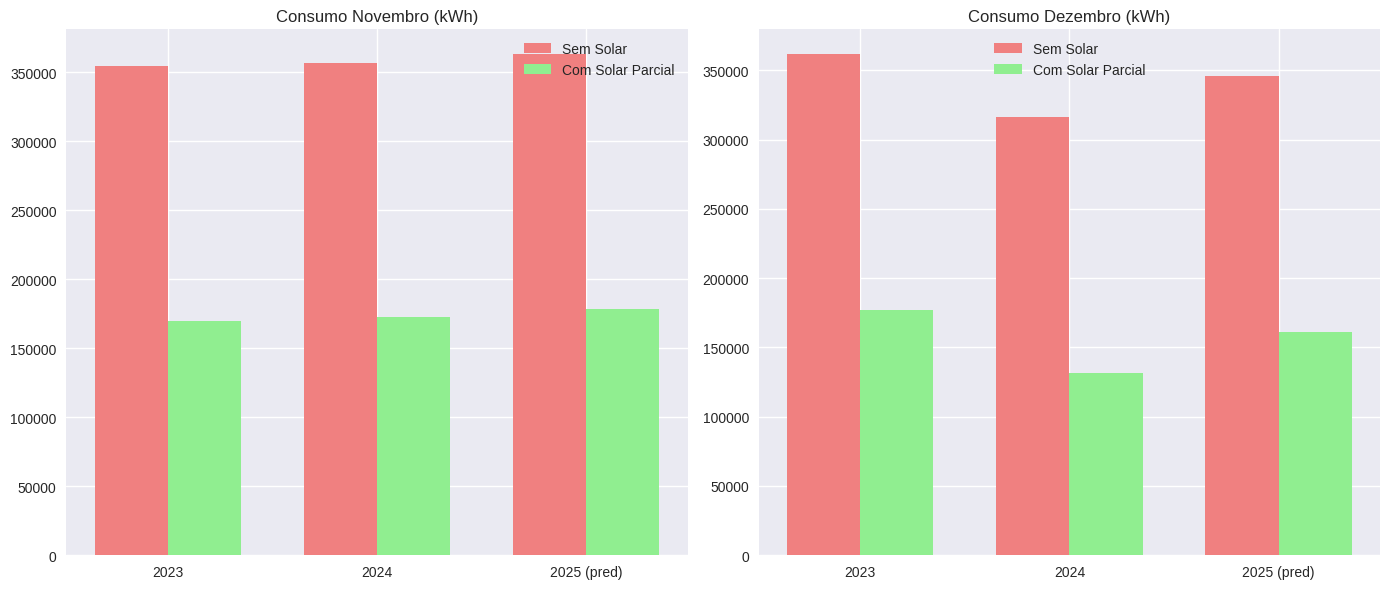

In [ ]:
anos = ['2023', '2024', '2025 (pred)']
nov_sem = [354563, 357015, pred_nov_2025]
nov_com = [354563 - energia_solar_mensal, 357015 - energia_solar_mensal, nov_solar]
dez_sem = [361420, 315984, pred_dez_2025]
dez_com = [361420 - energia_solar_mensal, 315984 - energia_solar_mensal, dez_solar]

x = np.arange(len(anos))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(x - width/2, nov_sem, width, label='Sem Solar', color='lightcoral')
ax1.bar(x + width/2, nov_com, width, label='Com Solar Parcial', color='lightgreen')
ax1.set_title('Consumo Novembro (kWh)')
ax1.set_xticks(x)
ax1.set_xticklabels(anos)
ax1.legend()

ax2.bar(x - width/2, dez_sem, width, label='Sem Solar', color='lightcoral')
ax2.bar(x + width/2, dez_com, width, label='Com Solar Parcial', color='lightgreen')
ax2.set_title('Consumo Dezembro (kWh)')
ax2.set_xticks(x)
ax2.set_xticklabels(anos)
ax2.legend()

plt.tight_layout()
plt.show()

## 8. Conclusão e Recomendações

- **Solução Viável:** Solar parcial on-grid com investimento 2.7M de reais, payback 1.44 anos, gasto restante aprox. 1.9M de reais/ano.
- **Impacto 2025:** Redução em aprox. 50% em nov/dez.

**Sustentabilidade Parcial + Economia = Futuro Inteligente**